In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import warnings;warnings.filterwarnings('ignore')

In [2]:
!pip3 install --upgrade matplotlib

In [3]:
# data
df_crg = pd.read_csv('/content/drive/MyDrive/Projects/EDA_KF/PMFBY coverage.csv')
df_sts = pd.read_csv('/content/drive/MyDrive/Projects/EDA_KF/PMFBY statistics.csv')
df_crg.head()

,sssyName.year,sssyName.seasonName,sssyName.schemeName,sssyName.stateName,level3Name,cropName,sumInsured,premiumRate,stateShare,goiShare,sssyID,seasonID,seasonCode,schemeID,schemeCode,stateID,stateCode,year,startDate,endDate,policyStartDate,policyEndDate,isOpen,cnStarted,cnIsCopied,policy,notification,isPreviousSeasonYearInSubsidy,isOfflineChallan,firstGoiSubsidy,goiOfflineChallan,stateOfflineChallan,default,level3ID,level3,level3Code,cropID,cropCode,pickingType,categoryName,cropType,type,unit,cropTypeCode,indemnityLevel,farmerShare,farmerShareValue,goiShareValue,stateShareValue,insuranceCompanyName,cutOfDate,tollFreeNumber,headQuaterAddress,headQuaterEmail,websiteLink,sssyName.schemeNameShort,insuranceCompany.insuranceCompanyID,insuranceCompany.insuranceCompanyCode,insuranceCompany.insuranceCompanyName
0,2021,Kharif,Pradhan Mantri Fasal Bima Yojana,Andaman Nicobar Islands,Nicobars,Paddy (Dhan),65676.0,8.0,4.5,3.0,4013521,CAF3184F-7713-482A-9C39-EBCFF9490D58,1,6F0AF1C1-19B2-40F5-AEAB-B8E0E374598F,4,1A20649E-499D-4452-8292-1225502C86F0,35,2021,2020-07-06 00:00:00,2023-12-01 00:00:00,2020-07-06 00:00:00,2021-10-09 23:59:59,1,1,NaN,0,0,True,False,False,False,False,1,D36579A0-9AC9-42D1-BD47-8ECAC585153B,District,638,A0379BEC-93DB-480A-B62D-C22207DFA969,10420200,single,Cereals,Agriculture,NaN,1,1,80,0.5,328.38,1970.28,2955.42,NATIONAL INSURANCE COMPANY LIMITED,2021-08-15 18:29:59,18003450330,"National Insurance Co. Ltd.3 , Middleton Stree...",customer.relations@nic.co.in,www.nationalinsuranceindia.nic.co.in,PMFBY,276CD213-DE68-4333-B4E8-492443494656,1016,NATIONAL INSURANCE COMPANY LIMITED
1,2021,Kharif,Pradhan Mantri Fasal Bima Yojana,Andaman Nicobar Islands,Nicobars,Paddy High Yielding Variety,69506.0,9.0,5.0,3.5,4013521,CAF3184F-7713-482A-9C39-EBCFF9490D58,1,6F0AF1C1-19B2-40F5-AEAB-B8E0E374598F,4,1A20649E-499D-4452-8292-1225502C86F0,35,2021,2020-07-06 00:00:00,2023-12-01 00:00:00,2020-07-06 00:00:00,2021-10-09 23:59:59,1,1,NaN,0,0,True,False,False,False,False,1,D36579A0-9AC9-42D1-BD47-8ECAC585153B,District,638,E23E1097-E03A-4CE0-9624-1921E1F663A0,10420211,single,Cereals,Agriculture,NaN,1,1,80,0.5,347.53,2432.71,3475.30,NATIONAL INSURANCE COMPANY LIMITED,2021-08-15 18:29:59,18003450330,"National Insurance Co. Ltd.3 , Middleton Stree...",customer.relations@nic.co.in,www.nationalinsuranceindia.nic.co.in,PMFBY,276CD213-DE68-4333-B4E8-492443494656,1016,NATIONAL INSURANCE COMPANY LIMITED
2,2021,Kharif,Pradhan Mantri Fasal Bima Yojana,Andaman Nicobar Islands,North and Middle Andaman,Paddy (Dhan),65676.0,8.0,4.5,3.0,4013521,CAF3184F-7713-482A-9C39-EBCFF9490D58,1,6F0AF1C1-19B2-40F5-AEAB-B8E0E374598F,4,1A20649E-499D-4452-8292-1225502C86F0,35,2021,2020-07-06 00:00:00,2023-12-01 00:00:00,2020-07-06 00:00:00,2021-10-09 23:59:59,1,1,NaN,0,0,True,False,False,False,False,1,1206E94C-A059-4C39-BEA4-6172564C1D35,District,639,A0379BEC-93DB-480A-B62D-C22207DFA969,10420200,single,Cereals,Agriculture,NaN,1,1,80,0.5,328.38,1970.28,2955.42,NATIONAL INSURANCE COMPANY LIMITED,2021-08-15 18:29:59,18003450330,"National Insurance Co. Ltd.3 , Middleton Stree...",customer.relations@nic.co.in,www.nationalinsuranceindia.nic.co.in,PMFBY,276CD213-DE68-4333-B4E8-492443494656,1016,NATIONAL INSURANCE COMPANY LIMITED
3,2021,Kharif,Pradhan Mantri Fasal Bima Yojana,Andaman Nicobar Islands,North and Middle Andaman,Paddy High Yielding Variety,69506.0,9.0,5.0,3.5,4013521,CAF3184F-7713-482A-9C39-EBCFF9490D58,1,6F0AF1C1-19B2-40F5-AEAB-B8E0E374598F,4,1A20649E-499D-4452-8292-1225502C86F0,35,2021,2020-07-06 00:00:00,2023-12-01 00:00:00,2020-07-06 00:00:00,2021-10-09 23:59:59,1,1,NaN,0,0,True,False,False,False,False,1,1206E94C-A059-4C39-BEA4-6172564C1D35,District,639,E23E1097-E03A-4CE0-9624-1921E1F663A0,10420211,single,Cereals,Agriculture,NaN,1,1,80,0.5,347.53,2432.71,3475.30,NATIONAL INSURANCE COMPANY LIMITED,2021-08-15 18:29:59,18003450330,"National Insurance Co. Ltd.3 , Middleton Stree...",customer.relations@nic.co.in,www.nationalinsuranceindia.nic.co.in,PMFBY,276CD213-DE68-43

## Data Cleaning

In [4]:
df_crg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24946 entries, 0 to 24945
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   sssyName.year                          24946 non-null  int64  
 1   sssyName.seasonName                    24946 non-null  object 
 2   sssyName.schemeName                    24946 non-null  object 
 3   sssyName.stateName                     24946 non-null  object 
 4   level3Name                             24946 non-null  object 
 5   cropName                               24946 non-null  object 
 6   sumInsured                             24946 non-null  float64
 7   premiumRate                            24946 non-null  float64
 8   stateShare                             24946 non-null  float64
 9   goiShare                               24946 non-null  float64
 10  sssyID                                 24946 non-null  int64  
 11  se

---
* "type" column has 100% null values
* "cnIsCopied" column has 95% null values
* We can drop "tollFreeNumber", "headQuaterAddress", "headQuaterEmail", "websiteLink" as these are not adding values.

Columns which seems adding same information (need to be verified)
```
* [sssyName.seasonName, seasonID, seasonCode]
* [sssyName.schemeName, schemeID, schemeCode, sssyName.schemeNameShort]
* [sssyName.stateName, stateID, stateCode]
* [sssyName.year, year]
* [level3Name, level3ID, level3Code, level3]
* [cropName, cropID, cropCode]
* [cropType, cropTypeCode]
* [insuranceCompany.insuranceCompanyID, insuranceCompany.insuranceCompanyName, insuranceCompanyName, insuranceCompany.insuranceCompanyCode] 
```
---

In [5]:
# column to be dropped
drop_col = ["type", "tollFreeNumber", "headQuaterAddress", "headQuaterEmail", "websiteLink"]

In [6]:
print("unique values", df_crg["cnIsCopied"].unique())
df_crg["cnIsCopied"].value_counts()

unique values [nan  1.]


1.0    1057
Name: cnIsCopied, dtype: int64

* We can drop "cnIsCopied" because it has 95% null values and are not adding much information

In [7]:
drop_col.append('cnIsCopied')

In [8]:
pd.crosstab(df_crg['sssyName.seasonName'], [df_crg['seasonCode'], df_crg['seasonID']])

seasonCode,1,2
seasonID,CAF3184F-7713-482A-9C39-EBCFF9490D58,35BF6040-B366-47B6-BC84-BF55AB8BE18B
sssyName.seasonName,,
Kharif,11659,0
Rabi,0,13287


It's doesn't seem these 3 columns are adding different information, so we can safely remove other two columns.

In [9]:
drop_col.extend(['seasonID', 'seasonCode'])

In [10]:
# , 'schemeID', 'schemeCode', 'sssyName.schemeNameShort']
pd.crosstab(df_crg['sssyName.schemeName'], [df_crg['sssyName.schemeNameShort'], df_crg.schemeID, df_crg.schemeCode,])


sssyName.schemeNameShort,PMFBY,WBCIS
schemeID,6F0AF1C1-19B2-40F5-AEAB-B8E0E374598F,CF11E013-1ADE-491B-ABAE-C6C098211CA5
schemeCode,4,2
sssyName.schemeName,,
Pradhan Mantri Fasal Bima Yojana,16972,0
Weather Based Crop Insurance Scheme,0,7974


From above crosstable we can see that these all 4 colors are same information so we can remove 3 of them

In [11]:
drop_col.extend(['schemeCode', 'schemeID', 'sssyName.schemeNameShort'])

In [12]:
pd.crosstab(df_crg['sssyName.stateName'], [df_crg.stateID, df_crg.stateCode], margins=True)

stateID,051D78A7-0BCF-42C3-AD76-F7EE6E4966A9,091E88D9-332A-4169-81D5-9B01A867E886,0A5BE76C-BDC2-4405-A32C-C46448FF136B,12522F0F-1B0D-4DA6-8150-A3C55ACD8B65,18691EED-BEB5-4D08-8E5F-E7C0FEC0F934,1A20649E-499D-4452-8292-1225502C86F0,20773CDE-D1B0-4338-9D32-43AB335CDA90,277E6128-EFCC-4811-BBF1-0EECCCBE45CA,2F3DE245-46E6-4C4D-9297-C0B23C803B15,2FAEC0DE-A0F4-4D86-BE61-BAF617116DD0,4A6C9793-C23A-45E1-8F92-6DA0AC644944,57CC16D0-F526-4DF4-A4AF-7A25929C06F1,5C77DA4F-BC9B-4099-BED7-15E06A45F376,5FB484F4-A27D-46BF-8368-81656DFBB157,635A659A-5B03-4DA2-832F-A7DE3490C162,6693A237-25BD-4446-91E3-F7F05F3B2B21,6BB658DA-1E4F-445D-AFC1-1276C51FD906,74B7F070-19E4-4DA6-AF8F-263EE5A6021C,966F786F-31CD-437F-B613-3430274407F2,A3E1E1AD-A0F1-41F1-B557-741769808B77,B7EB6AF0-CF11-4E6E-9456-624F3962629C,BE8DE3C1-7966-47BC-ABC5-D3E1C1CC50F3,C3C7D9E1-1A72-4345-90CE-F3EF95643A4C,D04CABC0-A1FE-45F0-A2D7-C61BA2B042DD,E27AC9FE-6359-4790-B433-3680B1B1B11F,All
stateCode,11,28,8,19,1,35,36,30,22,34,32,17,6,27,20,23,16,5,18,9,2,33,24,14,21,
sssyName.stateName,,,,,,,,,,,,,,,,,,,,,,,,,,
ASSAM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,90
Andaman Nicobar Islands,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44
Andhra Pradesh,0,339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,339
Assam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,402,0,0,0,0,0,0,402
CHHATTISGARH,0,0,0,0,0,0,0,0,236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,236
Chhattisgarh,0,0,0,0,0,0,0,0,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020
GOA,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
Goa,0,0,0,0,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45


These 3 columns are also adding the same information, so dropping two of them

In [13]:
drop_col.extend(['stateID', 'stateCode'])

In [14]:
pd.crosstab(df_crg['sssyName.year'], df_crg['year'])

year,2018,2019,2020,2021
sssyName.year,,,,
2018,7618,0,0,0
2019,0,6855,0,0
2020,0,0,5279,0
2021,0,0,0,5194


In [15]:
drop_col.append('sssyName.year')

In [16]:
pd.crosstab(df_crg.level3Name, [df_crg.level3ID, df_crg.level3Code, df_crg.level3])

level3ID,0055C22C-0C78-42AC-B895-A4B563430E96,00726892-477D-4AFE-A0E0-FAE3C89CB339,011686C5-E0A3-46DB-88A1-0E9AC5DA3BC7,01DE1D88-95BB-48A6-AE5A-088730A8743C,0276FAAD-B214-4D67-B2B2-7FE6946779C6,02808B22-814B-428C-A280-FF003734F155,02906045-2356-4227-A37F-9AAE9107CD1A,02C407DD-B890-46E4-A192-984321491225,02C9AC83-2B50-4613-943B-A06B06F395E8,02F5CDDD-9A6F-4AAD-9DD5-237B556B1E6A,0301BEF2-C457-4C8A-B4BD-980A747E44A6,0355A24D-83DE-404A-85DF-90E4BBD9DCA4,0444889D-1D40-4978-ACD7-F39A6179E380,0453D28C-3C69-409D-B405-383CE136441F,0459F9C8-DEF4-4FDA-8AAC-93F685C78A31,045E6A51-72D1-43F1-8E18-B6C1354D7609,05715B0D-1517-4063-BE1B-23ACE6A7FE31,0640109D-33F3-4D9B-9405-EE6E537D616C,067098B8-7AEB-40DC-A459-B2322D2853D8,071F5BDB-ACC1-48CE-AB31-8682319BD19E,0739A35F-6B4D-4BE4-90CE-75C1FFA8952F,081F6047-D428-497E-B49A-A9A9EF41020E,09084A98-778C-4F9C-991F-DA18D863EDCD,09120743-3E9E-4F4C-95B3-7503DB5C7913,09BFCF93-3DE4-4BAB-8D4F-A2F87F54D7EA,0A4AC3C9-DE22-4FF8-B416-25BB98578CBC,0ADA110F-6270-43FE-9049-BCAAFD3AB99E,0B5BBCFB-71F2-4673-9756-6A4873A4CF1D,0BD88593-CECB-43FC-9AC2-F41CC9DA6CED,0BF55707-DD52-48DC-A196-B6CB93C37962,0C146132-DE3F-44D7-8B13-6AEC0C546089,0C85AA29-8425-4A0C-868E-E2F3449A0F06,0CA370D3-0533-4A1D-B6C9-4559D788801E,0CF71862-E543-4412-A26C-5A18C52148B2,0D5F47C0-B6DA-4805-A591-0FB82EDFBA83,0EF54A44-9AB6-425C-ADE1-87EA8E7AA962,10269E51-73A6-4A59-8635-D08B62844FAC,1064A4DA-626F-4E28-9E45-B6C5C1BA623E,110C44AC-1929-4EFA-9BC8-ADDC439D4414,113C0B03-72C2-4299-9AF3-677489FAF67D,...,F0AE9F22-8DAF-4ED6-9FE2-C1F5B2BABD1D,F121887F-35C7-4DAE-8745-81A2679D6781,F159753F-3BA0-4863-A8FE-6D8A507D30F8,F17A8064-1965-43AA-A2E0-C374BCB5E736,F185D363-6899-43C4-BCD9-EFEF5F96BCDD,F1C66C8E-1C72-442F-8A2D-C8E46920B53A,F274478D-187B-44A6-B9E4-616CD0D3B40D,F2B00BC8-F403-4ED5-8185-4C5AC2B60BB8,F304A0F4-B096-4385-A3A0-0EFF0CD6FF24,F3964A58-DFE3-4557-82B3-333DBEC6DE5E,F3BA8391-8161-42D5-83E3-B1A7647ED697,F3CF5E5F-B30B-4B38-9CE4-210AFB66D401,F525B3D4-8D1A-4AE5-B800-0EAEE047BF06,F5341767-A878-4FB2-A4C2-8770B25F09BE,F5E671E9-9280-4817-A7F0-35901B573F3A,F61DDBBD-9D0A-4B81-9C10-2B30021029A2,F6C1B1B1-B75A-431F-B60A-73D1CA3204F9,F7444057-1654-4C85-8FD6-82EA8DA3CD97,F7FFC83C-11F9-43DA-9638-11CEC4EDAC18,F86E6172-BFB5-4489-909E-CFEE792F93BA,F89AACFD-2064-4173-B403-EEDF86859F27,F8B3D655-8D12-4AAA-8A77-7DFC473E139B,F9845968-100E-4DD1-9D43-B1710B734DA7,F9F237FB-4E33-4B68-9AE4-2BD748B64546,FA272C0B-319E-436C-9292-47FEC30395BF,FB3023C2-49A3-4C10-89D7-5F858402045F,FBBF903D-9EA2-4217-851B-6DF5C0BA1669,FCB96BB0-54AB-4AB7-A41C-36054D3D4E5F,FCE3D0BA-AC02-4BC5-AB22-FBB57BBE3C8F,FD119FB4-E940-4243-AAC8-D878C360EDE1,FD1BC89C-FACD-402A-8ED6-DF2ECBC21FF1,FDB5B5CF-33D1-412B-951D-457B25FFE187,FDEE3A1A-6E6B-41F9-B056-AFF7570E9450,FE0A9833-BDA1-4BE3-99F8-25565453DFC2,FE0C412D-E493-4AFE-B4E3-AF90B8F9AF01,FE7AF236-33DA-4861-BFA8-4247C467DC16,FF1D90D8-7CAD-40F1-8AAD-6D29C98F22C3,FF6FA275-ACB3-4C63-A96B-46B610BD2DFD,FF790098-94CB-497D-A899-6FFE70604BAE,FF8C472E-2DF0-44CE-AEF3-F530FFB8F001
level3Code,449,22,105,940,122,202,952,365,200,538,171,386,438,612,194,455,331,945,510,355,803,614,524,151,527,902,482,918,356,444,416,402,628,539,156,429,343,951,804,501,...,932,23,484,585,27,925,280,516,325,312,318,911,336,806,352,21,472,800,428,323,454,921,298,606,327,199,615,908,25,349,939,903,451,433,109,468,6,67,409,983
level3,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,...,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,District,Distr

In [17]:
print("len of level3Name", len(df_crg.level3Name.unique()))
print("len of level3ID", len(df_crg.level3ID.unique()))
print("len of level3Code", len(df_crg.level3Code.unique()))
print("len of level3", len(df_crg.level3.unique()))

len of level3Name 562
len of level3ID 564
len of level3Code 564
len of level3 1


"level3ID" and "level3Code" looks similar so we can further investigate on them. Also "level3" column has only one unique value so we can drop them.

In [18]:
temp = df_crg[['level3ID', 'level3Code']].copy()
temp['mergd'] = temp.level3ID + temp.level3Code.apply(str)
temp.sample(5)

,level3ID,level3Code,mergd
4920,3E034E8F-2C7B-4AF3-8EFF-C2163DD28E38,26,3E034E8F-2C7B-4AF3-8EFF-C2163DD28E3826
5082,67B0FBB6-C88B-4D21-8CD5-DE9B5A95A014,33,67B0FBB6-C88B-4D21-8CD5-DE9B5A95A01433
9517,38C92308-309A-4408-BFBE-D2EDE6318B7B,432,38C92308-309A-4408-BFBE-D2EDE6318B7B432
6224,58567C39-6DD9-48E0-8D9D-A60CBAEBFF08,595,58567C39-6DD9-48E0-8D9D-A60CBAEBFF08595
2919,65975DD2-19E1-489A-AE4E-63DD8521568B,407,65975DD2-19E1-489A-AE4E-63DD8521568B407


In [19]:
print("len of level3ID", len(temp.level3ID.unique()))
print("len of level3ID", len(temp.mergd.unique()))

len of level3ID 564
len of level3ID 564


we merged both column to create a unique key and tried to search if we have any duplicates, but from above output we can see that both merged and unmerged column have same number of unique values and hence we can conclude that both are adding same value. So we can safely remove one of them

In [20]:
drop_col.extend(['level3ID', 'level3'])

In [21]:
pd.crosstab(df_crg.cropName, df_crg.cropID)

cropID,0021CD4F-F7D5-4FE4-A1F3-CD574CB77BA6,022F23F1-6D7B-4824-A14F-152B631BB199,050A0453-65A1-407A-A514-4A451F0E53BD,06CE7CF9-393F-4A69-9FF8-2634099DDBD4,07442317-FA93-43F4-9331-CA032632CECA,0837B57F-8069-4A1A-9E1F-BFB28BF94296,0A14D25B-B345-4B85-8F3B-9A8327FF7ED1,0A432808-1B28-46A6-BBA3-0F78BD563CC8,0B4E0AD4-3FFF-4D0A-A643-A9FFBBA75582,0BDC17AB-5C80-4E5C-901C-B98F3F8E5389,0CA50354-3547-40EF-BB97-47AAB4591703,0D81A1C6-F621-4FF4-B539-920E653788E3,0DC19786-8144-4AAF-8281-F029A9F1E16E,0DD364C9-14D2-4688-B06A-031451D5C32F,10AC24AC-5809-4390-8F08-7232A6331C1C,112BC660-63B9-49C6-A0B7-0D00F05D5242,1216124D-FA5B-489F-9624-DA48A6E67DFE,14BA4A6D-756D-4285-8658-ACD0B9728C63,15E02853-973A-4965-BC03-45C3A7FD5BF2,18B10733-C5B5-4AE3-BF13-DA0BF3E42D61,18E9038F-F6F8-472D-B962-0538E90FDF6B,1953588B-2247-49C9-9E18-44113736D5A2,1A03D660-ADF3-4EB3-B38E-6554964D6390,1B531A76-8D8F-48A1-85FA-D11EC274AFF1,1BD2C4F8-333E-4B7C-9386-8FAF4694B6C8,1E303448-AD24-420B-A27A-C55D59EC703B,208F2C5D-40C4-447C-BE14-72BE15D09B12,220BE474-9FCE-4D79-85FF-9CE250AD20DF,237A1AEA-2F91-4DF9-9EBA-5CD999A3235A,23E50155-6945-4275-BAB7-B33F34E928EC,246A77D3-7D40-4C08-9957-6A7EB81387E4,24A0BD0D-73E7-44A0-887F-7AAE4EA19197,25EC7A0F-88E3-4D26-8871-8259E0B79971,260FC84F-8CE2-4D47-B941-995E93C151C6,276BC77E-5973-48FA-B49A-D50A41F68376,27B9FD8B-2342-4FAD-B3BD-616D51320351,27BE9939-89AA-46E2-BBF6-AD0004FBC8E0,27DEE86D-F5C4-41A9-A298-1FB192497C07,27ED1D02-F711-4CE6-AF47-CCD07BACB110,2B52EBF3-1735-498C-9DCC-14EDE4F7B5A7,...,D97AC6DF-FF89-46D2-9A57-6EF362FE78CB,DA0A2D41-4FDF-464D-B32A-4DFDDCA9BC20,DC459270-E48E-470C-B14E-7651FDFFE5DE,DD7B4E57-3108-4B11-BAEA-2C17B54CCDE9,DE712925-A3D2-4030-87BC-F39FDA67B113,DF3C83B6-C7A6-4886-AB48-FD350D327885,E0D93DF4-D266-4406-8B2F-DEC893D29146,E1292AD9-03C4-4FC9-9628-B4598588A0FA,E13EB0AD-3F43-4776-B103-640E95F5BE0F,E23E1097-E03A-4CE0-9624-1921E1F663A0,E463476A-88C8-407D-8DE2-BC85D435C6B6,E49A8513-28AA-45F0-B417-8CBAB422A7B4,E6E97200-FBE7-485B-8B02-C4F85B52DEE1,E78A3C9F-23DA-4E9C-B997-CD5E03F8E55C,E86BF4CB-EFF6-4820-84AB-DD02195105D0,E968BCC8-0515-4310-8702-9E5F661BCFFE,E9B32657-14F6-4686-ADBF-B978C6C7987E,EA6FAB62-C4BA-4EC7-ACDB-8E444D53427C,EB889B92-7496-498B-9622-370629EF4252,EBD22367-A894-40EF-BEF9-1D0BB74ACB0F,ECADDDF5-218C-4022-BB11-AABF2BD27C88,ED8022B7-221E-4F7C-931B-47104BF85BF4,EE8D02A6-6C96-4E87-A978-BDADF3B94D76,F17B91B3-45E9-48EE-9D26-0F5950A1F246,F22245FA-84C8-499A-825F-6EAAE81DE8C5,F3E8A3EF-CA98-477C-BF6D-4FC4C3741DFC,F4F2912B-329C-42F5-B77E-5818A735D13E,F5A877E4-B93C-4E63-889E-672725EE67E2,F6A37795-CEB3-4E6E-843C-A135A6747256,F888AD0D-3EEF-47DF-A307-DBAD6A59096F,F99E0FA9-D9AE-4B9D-B3D2-184816C4AE50,FA63BD55-E3B8-494B-9976-FECB1E21DE69,FB05B970-4DD8-444F-BD44-8AE5D117C228,FB58024B-C089-43D1-8B96-76C0CBBA50FD,FD33955A-75C4-441C-A037-08948D69D790,FD505265-46F1-4EE4-B1AA-77551A421899,FD79BAF4-D341-4441-A49C-9A58C4E8C721,FD7AE712-CF6D-4130-BC91-1A3E7FDF0FC8,FD84873E-A5C2-434D-B0BD-1D49F0FDA4D8,FE748316-5A36-4F6E-BB1E-B128D9F57FE8
cropName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acid Lime,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amarphophallus (Surankand/Elephant Foot Yam),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aonla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Apple - 15 To 40 Years,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Apple - 5 To 15 Years,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,

In [22]:
print("len of cropName", len(df_crg.cropName.unique()))
print("len of cropID", len(df_crg.cropID.unique()))

len of cropName 233
len of cropID 238


These columns aren't same.

In [23]:
print("len of cropType", len(df_crg.cropType.unique()))
print("len of cropTypeCode", len(df_crg.cropTypeCode.unique()))

len of cropType 2
len of cropTypeCode 2


In [24]:
pd.crosstab(df_crg.cropType, df_crg.cropTypeCode)

cropTypeCode,1,2
cropType,,
Agriculture,13649,0
Horticulture & Commercial,0,11297


In [25]:
drop_col.append('cropTypeCode')

In [26]:
print("len of insuranceCompany.insuranceCompanyID", len(df_crg['insuranceCompany.insuranceCompanyID'].unique()))
print("len of insuranceCompany.insuranceCompanyName", len(df_crg['insuranceCompany.insuranceCompanyName'].unique()))
print("len of insuranceCompany.insuranceCompanyCode", len(df_crg['insuranceCompany.insuranceCompanyCode'].unique()))
print("len of insuranceCompanyName", len(df_crg['insuranceCompanyName'].unique()))

len of insuranceCompany.insuranceCompanyID 17
len of insuranceCompany.insuranceCompanyName 17
len of insuranceCompany.insuranceCompanyCode 17
len of insuranceCompanyName 17


In [27]:
pd.crosstab(df_crg['insuranceCompany.insuranceCompanyID'], [df_crg['insuranceCompanyName'], df_crg['insuranceCompany.insuranceCompanyName'], df_crg['insuranceCompany.insuranceCompanyCode']], margins=True)

insuranceCompanyName                  AGRICULTURE INSURANCE COMPANY  ...    All
insuranceCompany.insuranceCompanyName AGRICULTURE INSURANCE COMPANY  ...       
insuranceCompany.insuranceCompanyCode                          1001  ...       
insuranceCompany.insuranceCompanyID                                  ...       
276CD213-DE68-4333-B4E8-492443494656                              0  ...    867
2ABE4BBC-3060-4BA5-9B40-65370DEB0D1D                              0  ...    237
370CE721-FCF9-4088-B769-EFE416336A70                              0  ...   1281
5B0E7CBC-E383-410F-8D47-AAFB16DE2F5D                              0  ...    903
5B21F95D-6033-473F-BDEB-46DFA93BC37B                              0  ...    478
70C1D1CF-6BF3-49A0-9765-192464B882DA                              0  ...    394
82A6E862-91E4-4BE4-86C1-D04A60D9D562                              0  ...    172
8501AE91-898E-4D46-B6F4-6CB70E6AC635                              0  ...    442
8F92B39E-F7DD-4021-8782-03FAF3EB00A1                              0  ...   2564
9A02DE3E-04CB-4293-8C91-1ED779834C53                              0  ...    906
AED99B42-6EE5-47A7-A637-730EB24563B8                              0  ...   2793
BA4A0759-45F1-4EC3-BF08-1C28CC9949BD                              0  ...   1239
C932B544-409E-4A34-9AFB-128DA423E947                              0  ...    274
D19CD684-BCCB-4575-BC6B-0687572B0D3F                              0  ...    207
DA21FAC5-5E58-4EBE-81BB-2B96DD4D3A29                              0  ...   1228
FB066A4B-1C1B-4467-B107-57B263911149                           9657  ...   9659
FE754761-1650-40EF-B4CE-DD5EAFF04478                              0  ...   1302
All                                                            9657  ...  24946

[18 rows x 22 columns]

These all four columns are same, so we can safely drop any three of them

In [28]:
drop_col.extend(['insuranceCompany.insuranceCompanyName',  'insuranceCompany.insuranceCompanyCode', 'insuranceCompany.insuranceCompanyID'])

In [29]:
print(len(drop_col))
df_crg.drop(drop_col, axis=1, inplace=True)

20


20 columns are dropped

In [30]:
df_crg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24946 entries, 0 to 24945
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sssyName.seasonName            24946 non-null  object 
 1   sssyName.schemeName            24946 non-null  object 
 2   sssyName.stateName             24946 non-null  object 
 3   level3Name                     24946 non-null  object 
 4   cropName                       24946 non-null  object 
 5   sumInsured                     24946 non-null  float64
 6   premiumRate                    24946 non-null  float64
 7   stateShare                     24946 non-null  float64
 8   goiShare                       24946 non-null  float64
 9   sssyID                         24946 non-null  int64  
 10  year                           24946 non-null  int64  
 11  startDate                      24946 non-null  object 
 12  endDate                        24946 non-null 

In [31]:
print(len(df_crg['sssyName.stateName'].value_counts()))
df_crg['sssyName.stateName'].value_counts()

41


Madhya Pradesh              3437
Uttar Pradesh               2650
Tamil Nadu                  2484
Maharashtra                 2108
Chhattisgarh                2020
Rajasthan                   1580
Kerala                      1235
Uttarakhand                 1172
Odisha                       943
West Bengal                  910
Telangana                    803
Gujarat                      705
Haryana                      682
TAMIL NADU                   433
Assam                        402
Himachal Pradesh             365
Andhra Pradesh               339
KERALA                       314
Jharkhand                    288
MAHARASHTRA                  249
CHHATTISGARH                 236
MADHYA PRADESH               217
RAJASTHAN                    209
Tripura                      185
ODISHA                       172
Sikkim                       118
HARYANA                      110
Meghalaya                     92
ASSAM                         90
HIMACHAL PRADESH              57
Puducherry

Lots of state's name are repeated with different case

In [32]:
print(len(df_crg['sssyName.stateName'].str.capitalize().value_counts()))
df_crg['sssyName.stateName'] = df_crg['sssyName.stateName'].apply(lambda x: x.capitalize())
df_crg['sssyName.stateName'].value_counts()

25


Madhya pradesh              3654
Tamil nadu                  2917
Uttar pradesh               2650
Maharashtra                 2357
Chhattisgarh                2256
Rajasthan                   1789
Kerala                      1549
Uttarakhand                 1172
Odisha                      1115
West bengal                  910
Telangana                    803
Haryana                      792
Gujarat                      705
Assam                        492
Himachal pradesh             422
Andhra pradesh               339
Jharkhand                    288
Tripura                      233
Sikkim                       138
Meghalaya                    110
Puducherry                    65
Manipur                       54
Goa                           50
Andaman  nicobar islands      44
Jammu and kashmir             42
Name: sssyName.stateName, dtype: int64

We only have 25 unique states in our dataset

## EDA

#### Crop

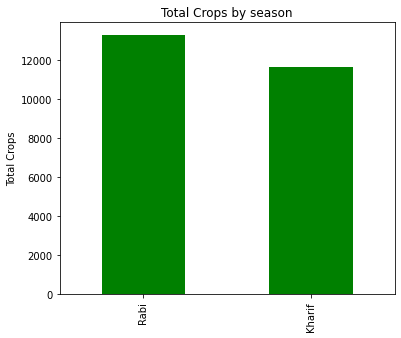

In [33]:
# crop by season
plt.figure(figsize=(6, 5))
df_crg['sssyName.seasonName'].value_counts().plot(kind='bar', color='green')
plt.title('Total Crops by season')
plt.ylabel('Total Crops')
plt.show()

> We have more Rabi crops in our dataset than Kharif crops

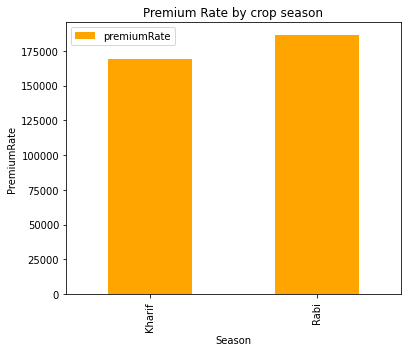

In [34]:
# Premium Rate by crop season
plt.rcParams['figure.figsize'] = figsize=(6, 5)
temp = df_crg.groupby('sssyName.seasonName').agg({'premiumRate': 'sum'}).plot(kind='bar', color='orange')
plt.title('Premium Rate by crop season')
plt.ylabel('PremiumRate')
plt.xlabel('Season')
plt.show()

> Rabi crops are in total paying high premium rate, the reason being the high production of Rabi crop compared to of kharif.

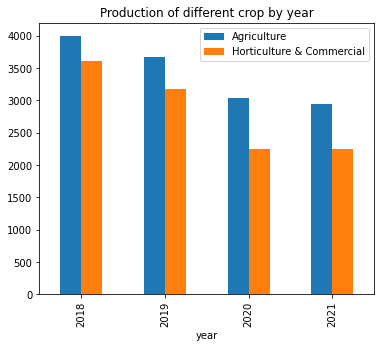

In [35]:
plt.rcParams['figure.figsize'] = figsize=(6, 5)
df_crg.groupby(['year', 'cropType']).agg({'cropType': 'count'}) \
                .unstack().plot(kind='bar')
plt.legend(labels=['Agriculture', 'Horticulture & Commercial'])
plt.title('Production of different crop by year')
plt.show()

> * Each year Agriculture is done more as compared to Horitculutre & Commercial
> * There is down trend in production of both crops by year.

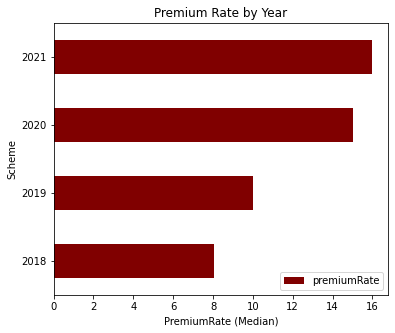

In [36]:
# premium rate by year
plt.rcParams['figure.figsize'] = figsize=(6, 5)
temp = df_crg.groupby('year').agg({'premiumRate': 'median'}).plot(kind='barh', color='maroon')
plt.title('Premium Rate by Year')
plt.xlabel('PremiumRate (Median)')
plt.ylabel('Scheme')
plt.show()

> * Avg Premium rate has increased over year, this could be one out of many reason for downard trend in crop production over year.

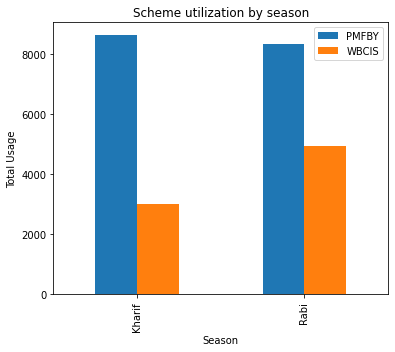

In [37]:
# crop season and scheme
plt.rcParams['figure.figsize'] = figsize=(6, 5)
df_crg.groupby(['sssyName.seasonName', 'sssyName.schemeName']).size().unstack().plot(kind='bar')
plt.legend(labels=['PMFBY', 'WBCIS'])
plt.title('Scheme utilization by season')
plt.xlabel('Season')
plt.ylabel('Total Usage')
plt.show()

> It looks like **WBCIS** scheme isn't that successful compared to PMFBY or there is some other reason which makes it less used compared to PMFBY.

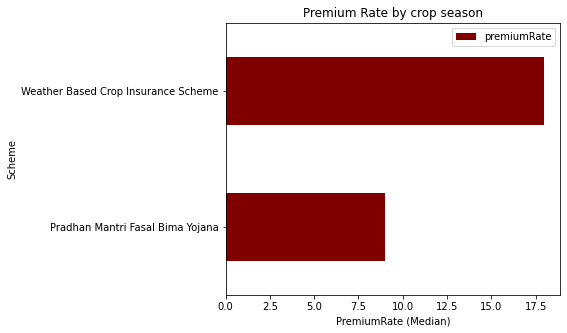

In [38]:
# premium rate by scheme
temp = df_crg.groupby('sssyName.schemeName').agg({'premiumRate': 'median'}).plot(kind='barh', color='maroon')
plt.title('Premium Rate by crop season')
plt.xlabel('PremiumRate (Median)')
plt.ylabel('Scheme')
plt.show()

> From the above graph it is clear that "WBCIS" is quite expensive with premiumRate which could be the reason of it less popularity

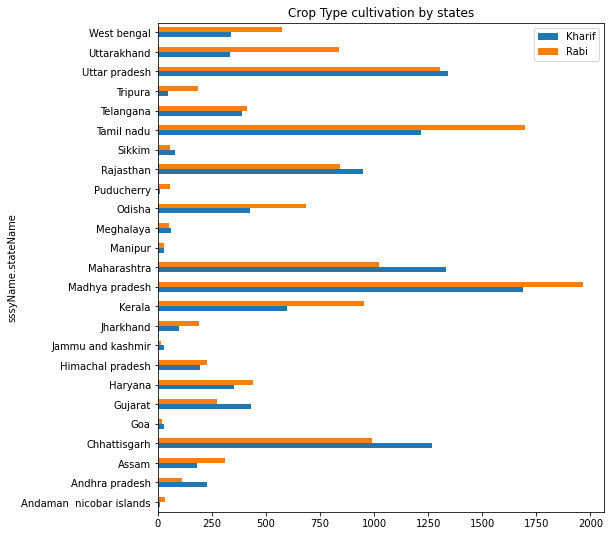

In [39]:
# Crop season cultivation by states
plt.rcParams['figure.figsize'] = figsize=(8, 9)
df_crg.groupby(['sssyName.stateName', 'sssyName.seasonName']).agg({"sssyName.seasonName": "count"}).unstack().plot(kind='barh')
plt.title('Crop Type cultivation by states')
plt.legend(labels=['Kharif', 'Rabi'])
plt.show()

> * Madya Pardesh is major producer of both Rabi and Kharif crops, followed by Tamil Nadu, and Chhattisgarh
> * Meanwhile Goa, and Jammu & Kashmir are minor producer of both seasoned crops.

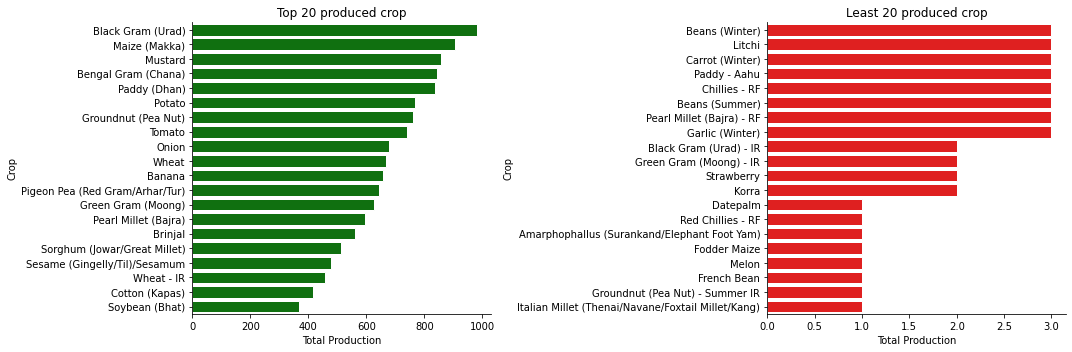

In [40]:

# Top 20 Crops by production
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style('white')

order1 = df_crg['cropName'].value_counts().head(20).index
order2 = df_crg['cropName'].value_counts().tail(20).index
sns.countplot(data=df_crg, y='cropName', order=order1, color='green', ax=ax[0])
sns.countplot(data=df_crg, y='cropName', order=order2, color='red', ax=ax[1])

ax[0].set_title('Top 20 produced crop')
ax[0].set_xlabel('Total Production')
ax[0].set_ylabel('Crop')
ax[1].set_title('Least 20 produced crop')
ax[1].set_xlabel('Total Production')
ax[1].set_ylabel('Crop')

sns.despine()
plt.tight_layout()
plt.show()

> Out of 211 crops "Black Gram (Urad)" is highly produced. While from the right graph it looks like there is some problem with labels itself which means these are somer false representation of least produced crops.

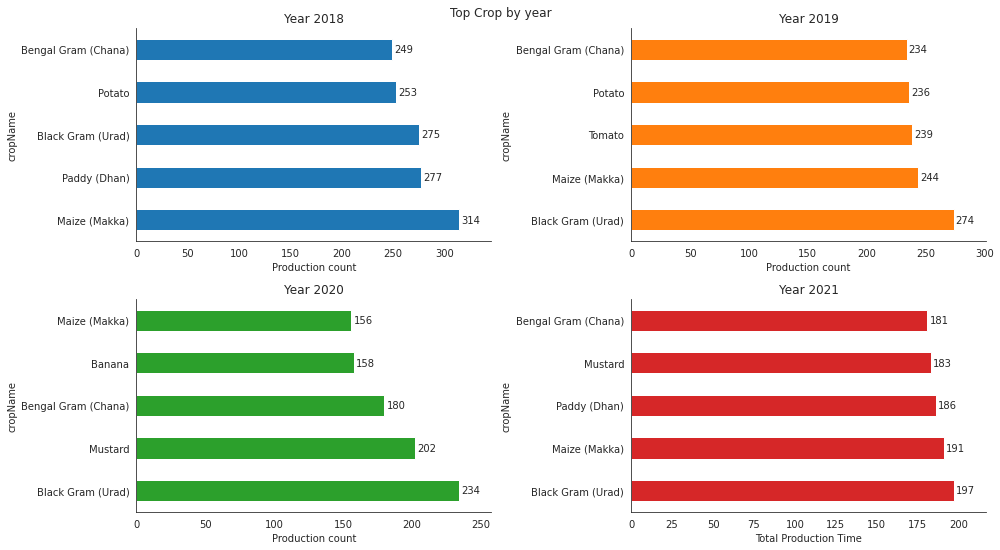

In [41]:
# Top 5 crops by year
sns.set_style('white')
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

df_crg[df_crg.year == 2018].groupby('cropName').size().nlargest(5).plot(kind='barh', color='C0', title='2018', ax=axs[0, 0])
df_crg[df_crg.year == 2019].groupby('cropName').size().nlargest(5).plot(kind='barh', color='C1', title='2019', ax=axs[0, 1])
df_crg[df_crg.year == 2020].groupby('cropName').size().nlargest(5).plot(kind='barh', color='C2', title='2020', ax=axs[1, 0])
df_crg[df_crg.year == 2021].groupby('cropName').size().nlargest(5).plot(kind='barh', color='C3', title='2021', ax=axs[1, 1])

for ax in axs.flat:
    ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', padding=2)
    ax.margins(x=0.1)

axs[0][0].set_title('Year 2018')
axs[0][1].set_title('Year 2019')
axs[1][0].set_title('Year 2020')
axs[1][1].set_title('Year 2021')
axs[0][0].set_xlabel('Production count')
axs[0][1].set_xlabel('Production count')
axs[1][0].set_xlabel('Production count')
axs[1][1].set_xlabel('Production count')
plt.xlabel('Total Production Time')
fig.suptitle('Top Crop by year', y=0.95)

sns.despine()
plt.tight_layout()
plt.show()

> * Black Gram (Urad) continues to be in top for last 3 years.
> * Mustard has taken it top5 place from last 2 year
> * Bengal Gram (chana), Maize (Makka) is cultivated in huge amount every year


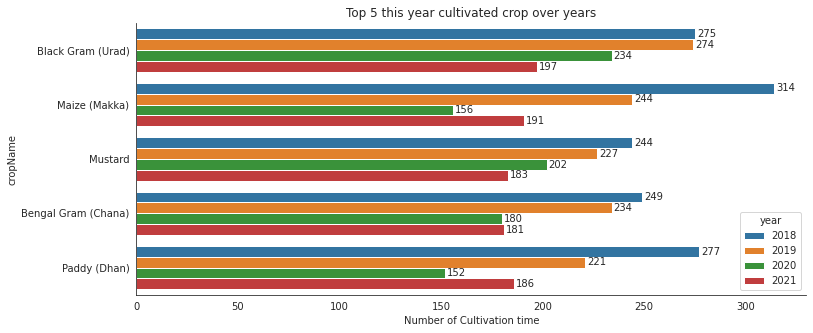

In [42]:
sns.set_style('white')
plt.figure(figsize=(12, 5))
order = df_crg.groupby('cropName').size().sort_values(ascending=False).head(5).index
ax = sns.countplot(data=df_crg, y='cropName', order=order, hue='year')

# annotation
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', label_type='edge', padding=2)

plt.xlabel('Number of Cultivation time')
plt.title('Top 5 this year cultivated crop over years')
sns.despine()
plt.show()

> * All top 5 crops were hugely culivated in 2018 and has a great 
reduction on 2020 However it seems Maize, Bengal gram and Paddy is making recovery from 2021.

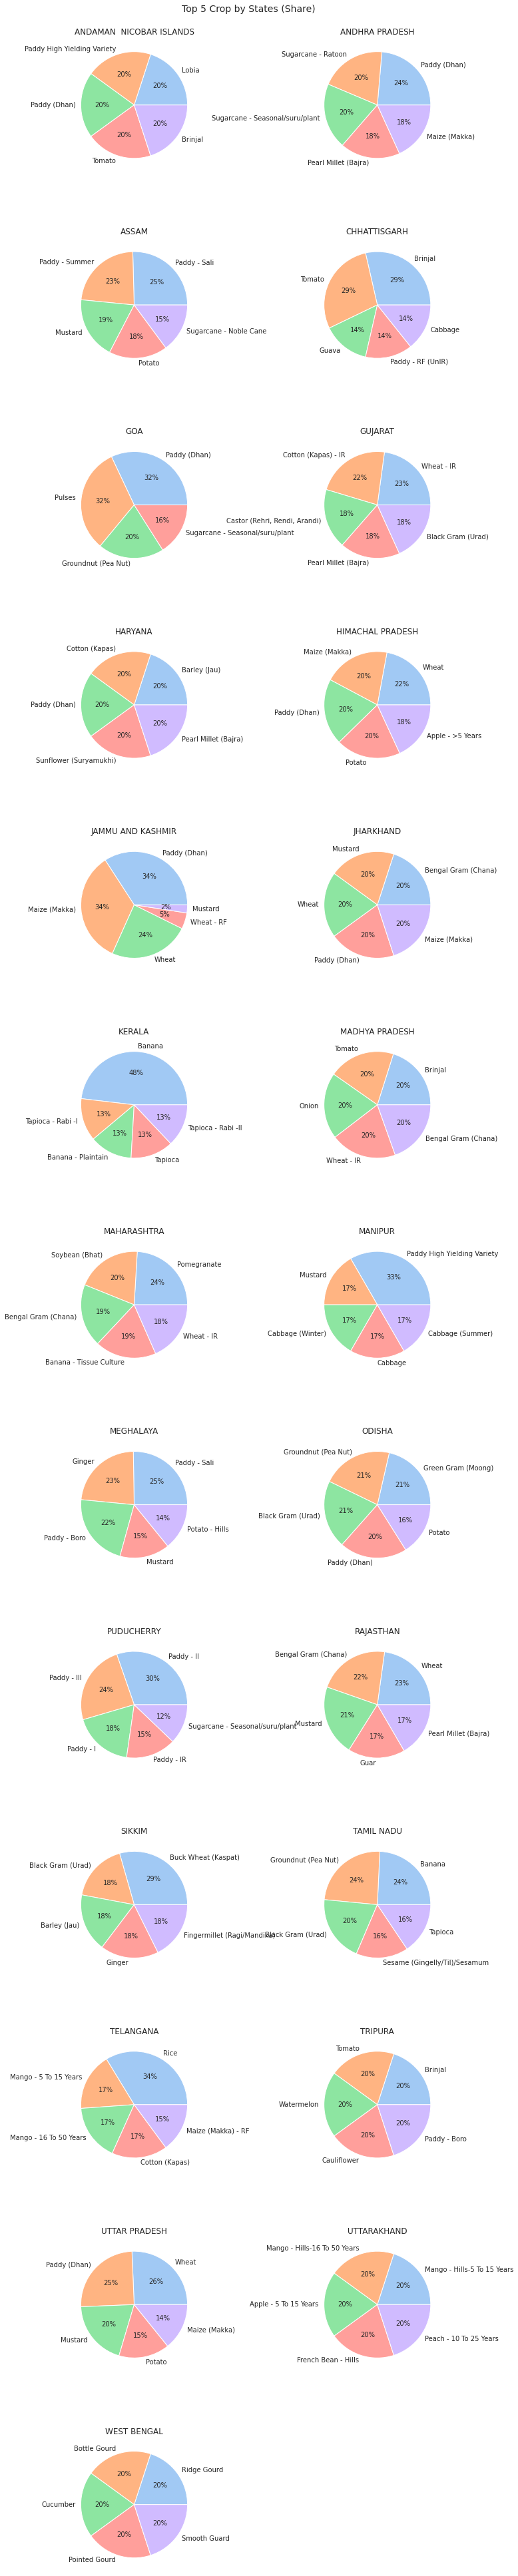

In [43]:
# Top 5 Crops cultivation by state
plt.figure(figsize=(12, 70))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Top 5 Crop by States (Share)", fontsize=14, y=0.89, x=0.5)

colors = sns.color_palette('pastel')[0:5]

# loop through the length of tickers and keep track of index
for n, state in enumerate(df_crg['sssyName.stateName'].unique()):
    # add a new subplot iteratively
    ax = plt.subplot(13, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    df_crg[df_crg['sssyName.stateName']==state]['cropName'] \
    .value_counts().head().plot(kind='pie', autopct='%.0f%%', colors = colors, ax=ax)

    # chart formatting
    ax.set_title(state.upper())
    ax.set_ylabel("")

> * In Top 5 cultivated crop Jammu & Kashmir produces Paddy, Maize and wheat.
> * In Kerala there is high production of banana

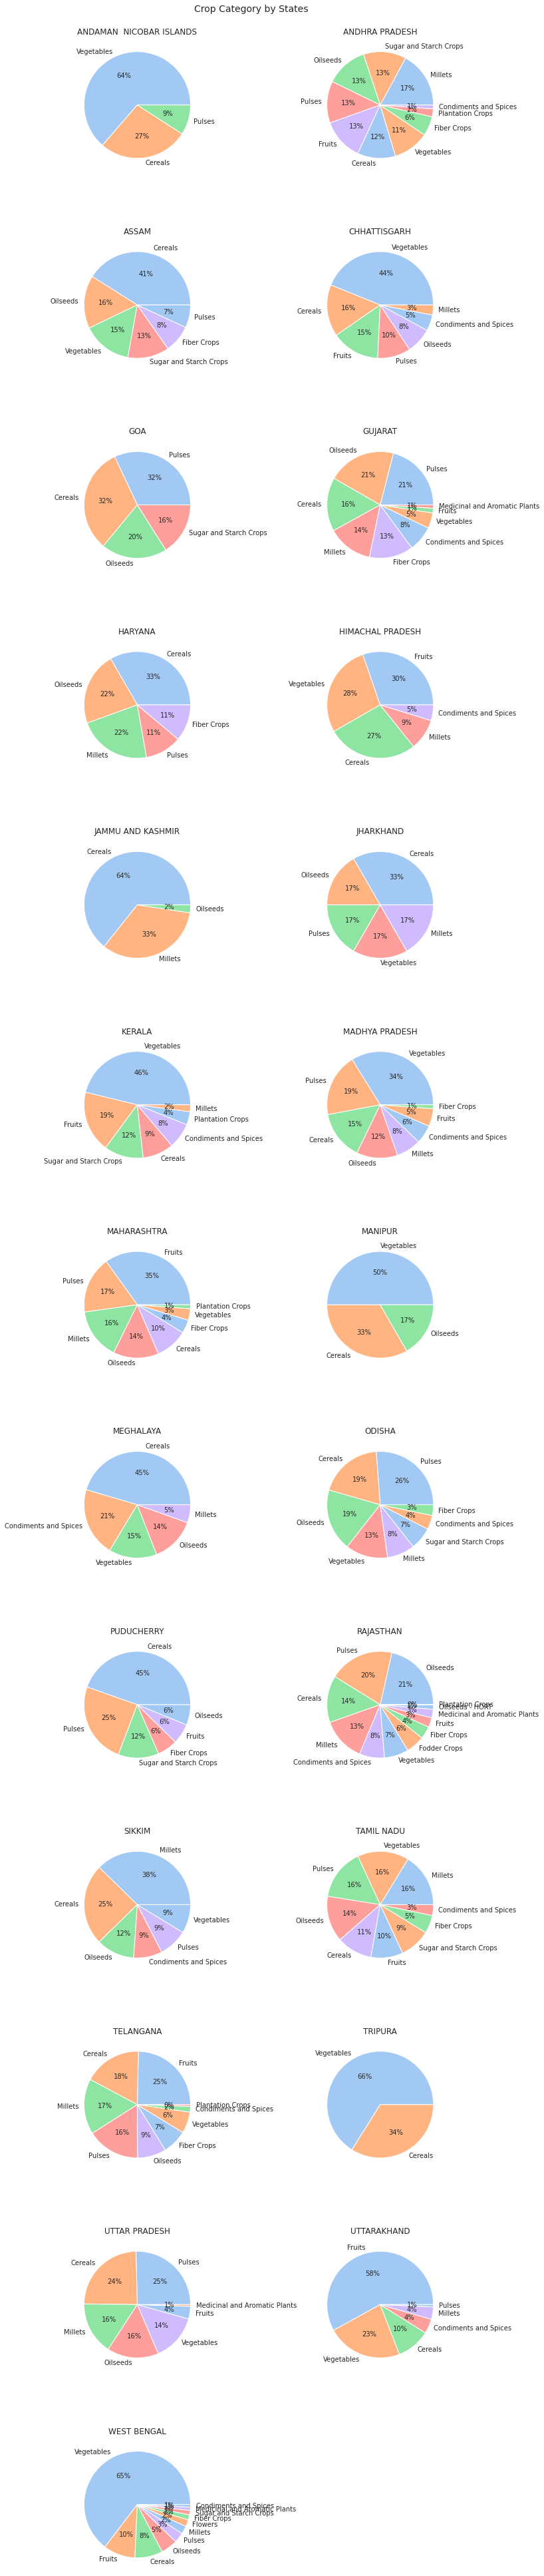

In [44]:
 # Top 5 Crops category by state
plt.figure(figsize=(12, 70))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Crop Category by States", fontsize=14, y=0.89, x=0.5)

colors = sns.color_palette('pastel')[0:5]

# loop through the length of tickers and keep track of index
for n, state in enumerate(df_crg['sssyName.stateName'].unique()):
    # add a new subplot iteratively
    ax = plt.subplot(13, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    df_crg[df_crg['sssyName.stateName']==state]['categoryName'] \
    .value_counts().plot(kind='pie', autopct='%.0f%%', colors = colors, ax=ax)

    # chart formatting
    ax.set_title(state.upper())
    ax.set_ylabel("")

> * Jammu & Kashmir, Jharkhand, Haryana, Goa, Meghalaya, Puducherry, and Assam have Cereal as higest cultivated crops
> * Uttarakhand, Telangana, Maharashtra, Himachal Pradesh have Fruits as higest cultivated crops
> * West Bengal, Tripura, Manipur, Kerla, Chhattisgrah, Andoman Nicobar majorly produces vegetables as compared to other crops.

#### Farmers

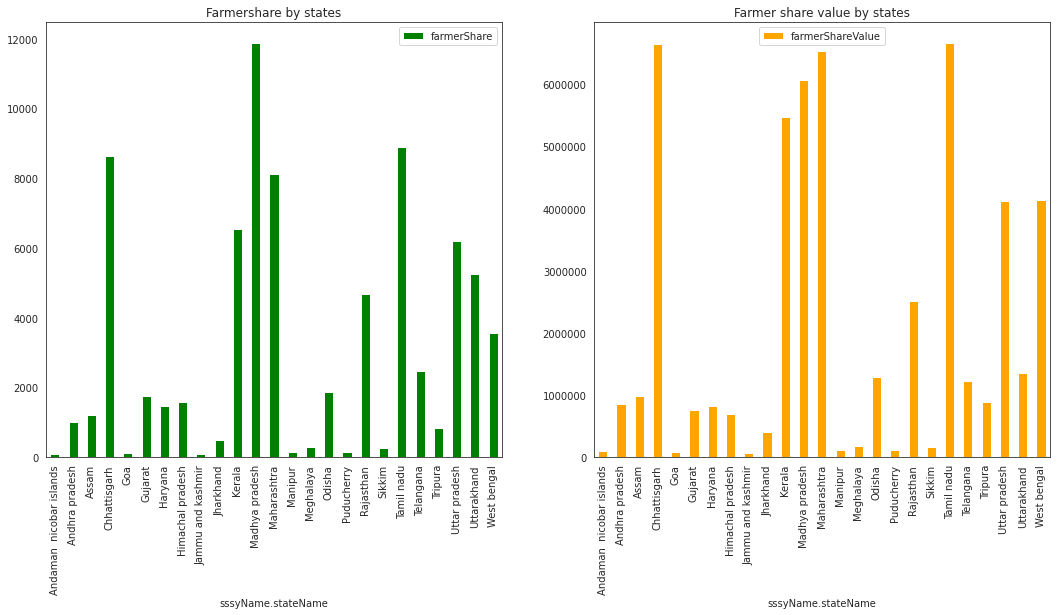

In [45]:
# Distribution of Farmers share and sharevalue by state
fig, ax = plt.subplots(1,2, figsize=(18, 8))
df_crg.groupby(['sssyName.stateName']).agg({"farmerShare": 'sum'}).plot(kind='bar', ax=ax[0], color='green')
ax[0].set_title('Farmershare by states')

df_crg.groupby(['sssyName.stateName']).agg({"farmerShareValue": 'sum'}).plot(kind='bar', ax=ax[1], color='orange')
ax[1].set_title('Farmer share value by states')
ax[1].ticklabel_format(style='plain', axis='y')

plt.show()

> * Chhattisgarh has highes sharevalue even with less share compared to Madhya Pradesh.
> * Jammu & Kashmir have both less share and share value.

#### Scheme & Premium

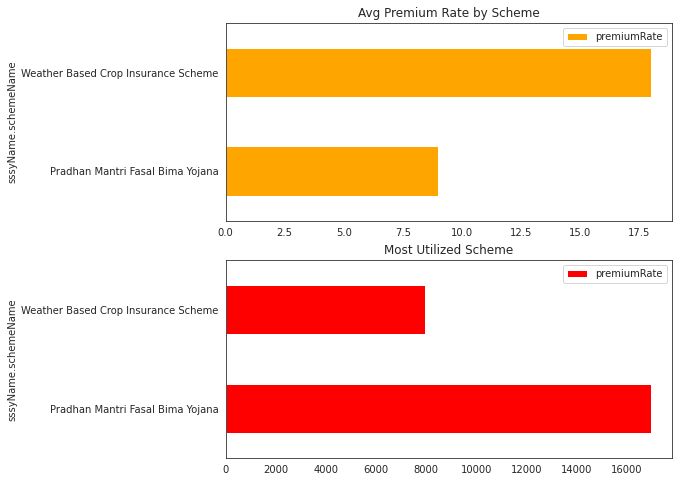

In [46]:
# Scheme by Premium 
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
df_crg.groupby(['sssyName.schemeName']).agg({"premiumRate": 'median'}).plot(kind='barh', color='orange', ax=ax[0])
df_crg.groupby(['sssyName.schemeName']).agg({"premiumRate": 'count'}).plot(kind='barh', color='red', ax=ax[1])
ax[0].set_title('Avg Premium Rate by Scheme')
ax[1].set_title('Most Utilized Scheme')
plt.show()

> * PMFBY scheme has low premium rate and is utilized more.

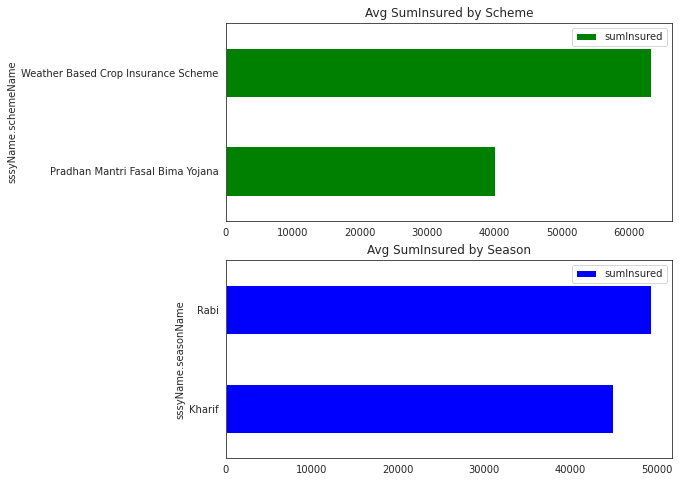

In [47]:
# SumInsured by shceme and crop season
# Scheme by Premium 
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
df_crg.groupby(['sssyName.schemeName']).agg({"sumInsured": 'median'}).plot(kind='barh', color='green', ax=ax[0])
df_crg.groupby(['sssyName.seasonName']).agg({"sumInsured": 'median'}).plot(kind='barh', color='blue', ax=ax[1])
ax[0].set_title('Avg SumInsured by Scheme')
ax[1].set_title('Avg SumInsured by Season')
plt.show()

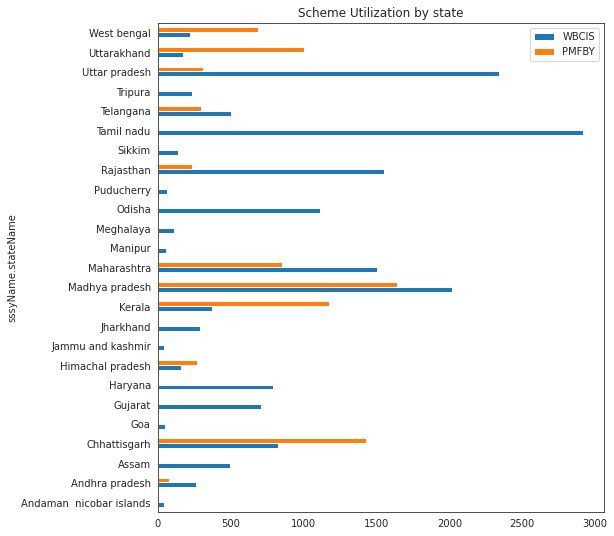

In [48]:
# Scheme utilization by states
plt.rcParams['figure.figsize'] = figsize=(8, 9)
df_crg.groupby(['sssyName.stateName', 'sssyName.schemeName']).agg({'sssyName.schemeName': 'count'}) \
                .unstack().plot(kind='barh')
plt.legend(labels=['WBCIS', 'PMFBY'])
plt.title('Scheme Utilization by state')
plt.show()

> * Tamil Nadu is major utilizer of WBCIS scheme, followed by Uttar Pradesh and Madhya Pradesh.
> * Madhya Pradesh is the major utilizer of PMFBY scheme, followed by Chhattisgarh, and Kerla.
> * Madhya Pradesh is also the major utilizer of both scheme together.

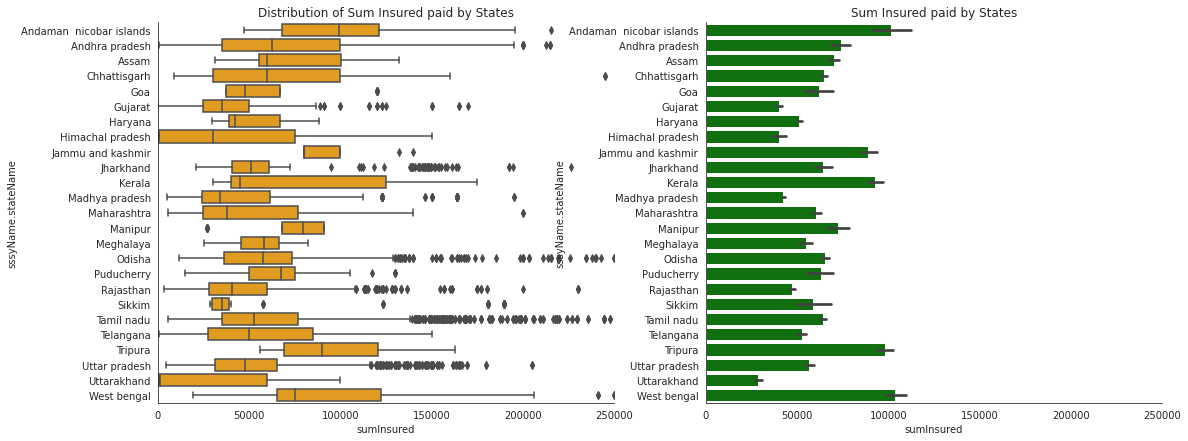

In [50]:
# sumInsured by states
fig, ax = plt.subplots(1,2, figsize=(18, 7), sharex=True)
sns.barplot(y=df_crg['sssyName.stateName'], x=df_crg['sumInsured'], color='green', orient='h', ax=ax[1])
sns.boxplot(y=df_crg['sssyName.stateName'], x=df_crg['sumInsured'], color='orange', orient='h', ax=ax[0])
ax[1].set_title('Sum Insured paid by States')
ax[0].set_title('Distribution of Sum Insured paid by States')
ax[0].ticklabel_format(style='plain', axis='x')
ax[0].set_xlim(0, 250000)
sns.despine()
plt.show()

> * There is high outliers in Tamil Nadu sum Insured payment, same goes with Uttar Pradesh and odisha.
> * Andaman nicobar, Uttarakhand, Assam, Goa, and few other states have comparatively less or no outliers.
> * Andaman nicobar, and Sikkim has high variablitiy in there Insured payment.

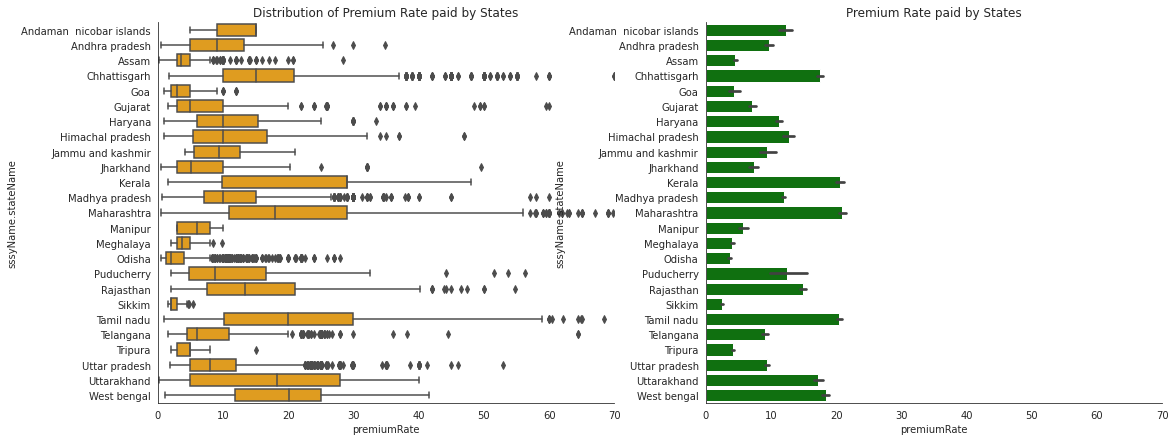

In [51]:
# Premium paid by states
fig, ax = plt.subplots(1,2, figsize=(18, 7), sharex=True)
sns.barplot(y=df_crg['sssyName.stateName'], x=df_crg['premiumRate'], color='green', orient='h', ax=ax[1])
sns.boxplot(y=df_crg['sssyName.stateName'], x=df_crg['premiumRate'], color='orange', orient='h', ax=ax[0])
ax[1].set_title('Premium Rate paid by States')
ax[0].set_title('Distribution of Premium Rate paid by States')
ax[0].set_xlim(0, 70)
sns.despine()
plt.show()

> * Odisha, Chattisgarh, Uttar Pradesh has lots of outlier.
> * Kerla, Tamil nadu, Uttarkhad, etc has comparatively less outlier 

#### Insurance Company

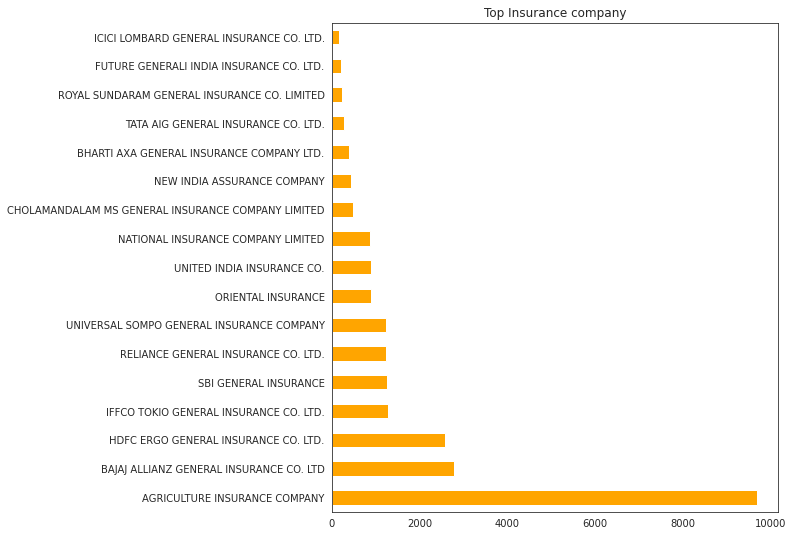

In [52]:
# Top Insurancer
plt.rcParams['figure.figsize'] = (8, 9)
df_crg['insuranceCompanyName'].value_counts().plot(kind='barh', color='orange')
plt.title('Top Insurance company')
plt.show()

> * Agriculture Insurance Company is largest insurancer in our dataset
> * And ICICI Lombard is the smallest inurancer in our dataset.

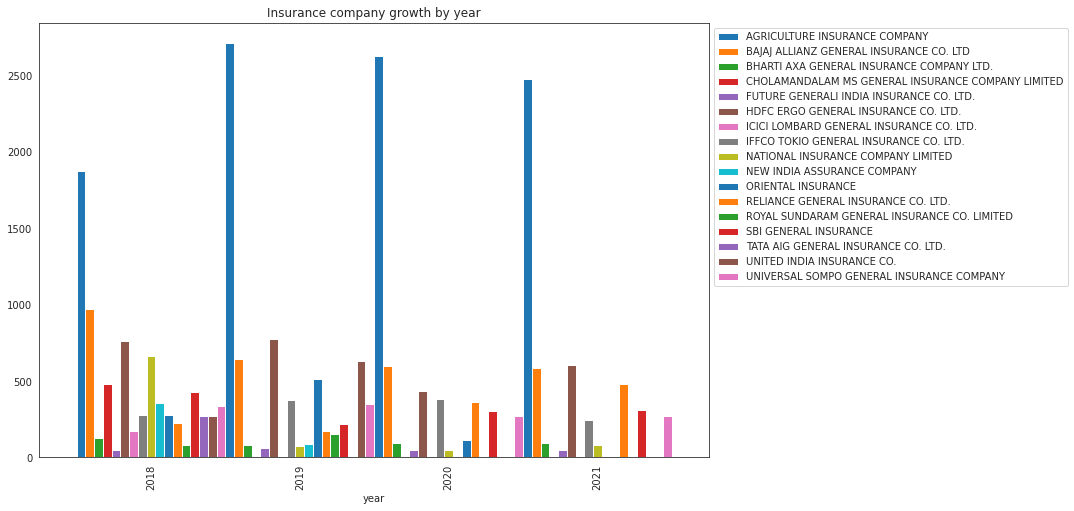

In [53]:
# Insurance company growth by year
plt.rcParams['figure.figsize'] = (12, 8)
df_crg.groupby(['year', 'insuranceCompanyName']).agg({"insuranceCompanyName": 'count'}).unstack() \
                .plot(kind='bar', width=1)
plt.legend(sorted(df_crg.insuranceCompanyName.unique()), bbox_to_anchor=(1.0, 1))
plt.title('Insurance company growth by year')
plt.show()

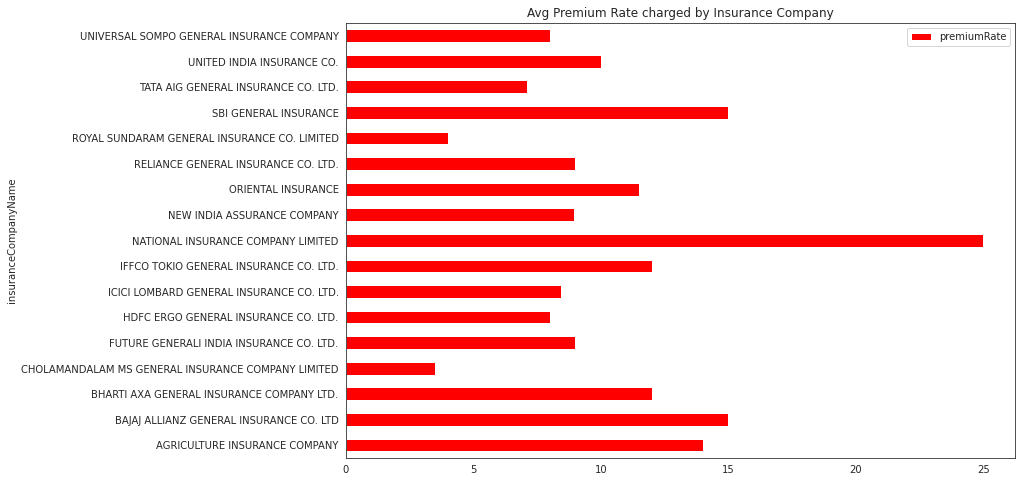

In [54]:
# Average premium rate by Insurance company
df_crg.groupby(['insuranceCompanyName']).agg({'premiumRate':'median'}).plot(kind='barh', color='red')
plt.title('Avg Premium Rate charged by Insurance Company')
plt.show()

> * National Insurance Company Limited has higest insurance rate.
> * Cholamandalam Ms General Insurance company Limited has lowest insurance rate


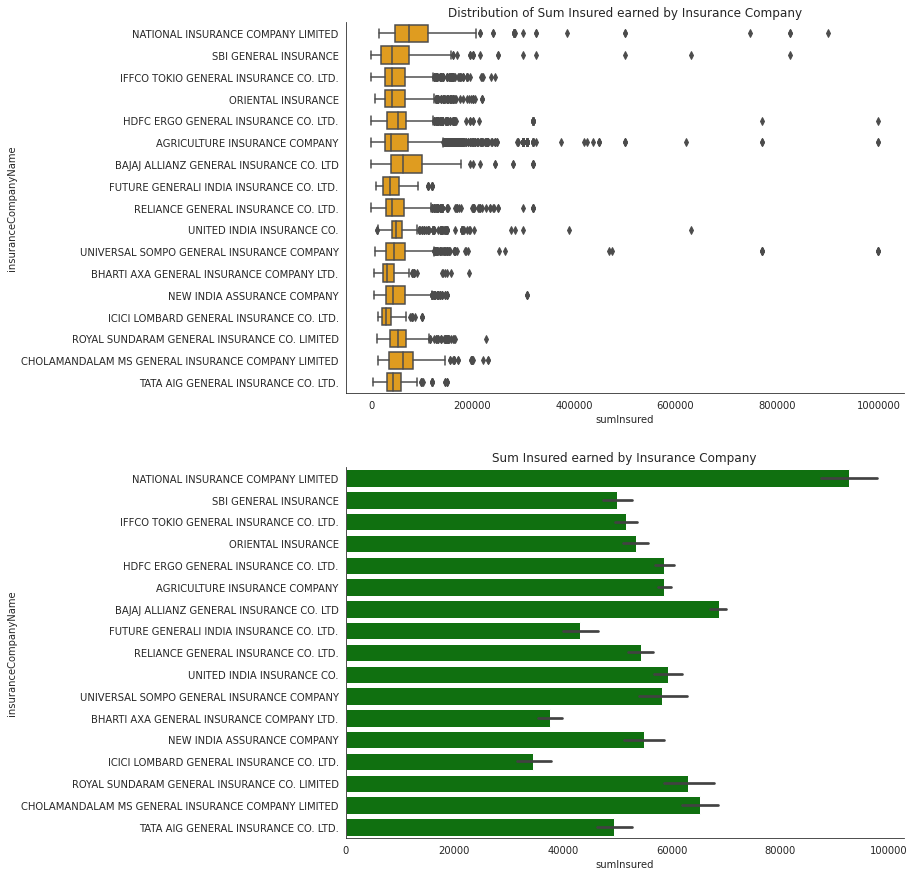

In [56]:
# sumInsured earned by Insurance Company
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
sns.barplot(y=df_crg['insuranceCompanyName'], x=df_crg['sumInsured'], color='green', orient='h', ax=ax[1])
sns.boxplot(y=df_crg['insuranceCompanyName'], x=df_crg['sumInsured'], color='orange', orient='h', ax=ax[0])
ax[1].set_title('Sum Insured earned by Insurance Company')
ax[0].set_title('Distribution of Sum Insured earned by Insurance Company')
ax[0].ticklabel_format(style='plain', axis='x')
# ax[0].set_xlim(0, 250000)
# ax[1].set_xlim(0, 250000)
sns.despine()
plt.show()

> * Most sum earned by National Insurance company, followed with Royal Sundaram, and Bajaj Allianz.
> * Agriculutre Insurance company has lots of outlier, followed by IIFCO Tokyo and HDFC Ergo.